In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size

In [8]:
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import interp2d
from scipy.linalg import inv, solve, det, eig

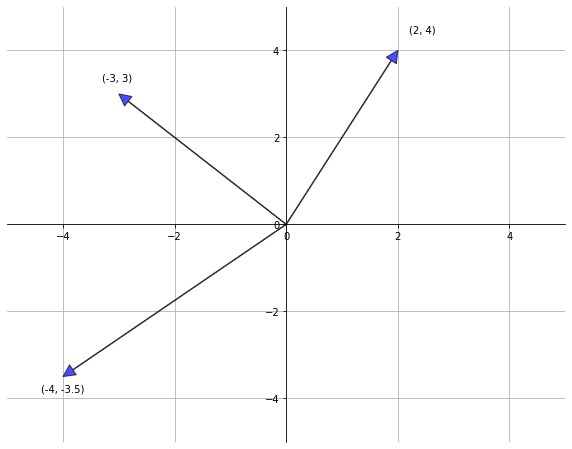

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.set(xlim=(-5, 5), ylim=(-5, 5))
ax.grid()
vecs = ((2, 4), (-3, 3), (-4, -3.5))
for v in vecs:
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='blue',
                shrink=0,
                alpha=0.7,
                width=0.5))
    ax.text(1.1 * v[0], 1.1 * v[1], str(v))
plt.show()

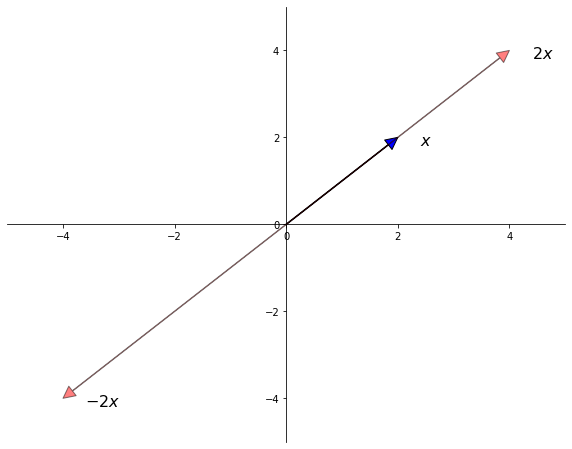

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.set(xlim=(-5, 5), ylim=(-5, 5))
x = (2, 2)
ax.annotate('', xy=x, xytext=(0, 0),
            arrowprops=dict(facecolor='blue',
            shrink=0,
            alpha=1,
            width=0.5))
ax.text(x[0] + 0.4, x[1] - 0.2, '$x$', fontsize='16')


scalars = (-2, 2)
x = np.array(x)

for s in scalars:
    v = s * x
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='red',
                shrink=0,
                alpha=0.5,
                width=0.5))
    ax.text(v[0] + 0.4, v[1] - 0.2, f'${s} x$', fontsize='16')
plt.show()

In [13]:
x = np.ones(3)            # Vector of three ones
y = np.array((2, 4, 6))   # Converts tuple (2, 4, 6) into array
x + y

array([3., 5., 7.])

In [14]:
4 * x

array([4., 4., 4.])

In [15]:
np.sum(x * y)          # Inner product of x and y

12.0

In [16]:
np.sqrt(np.sum(x**2))  # Norm of x, take one

1.7320508075688772

In [17]:
np.linalg.norm(x)      # Norm of x, take two

1.7320508075688772

ipykernel_launcher:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


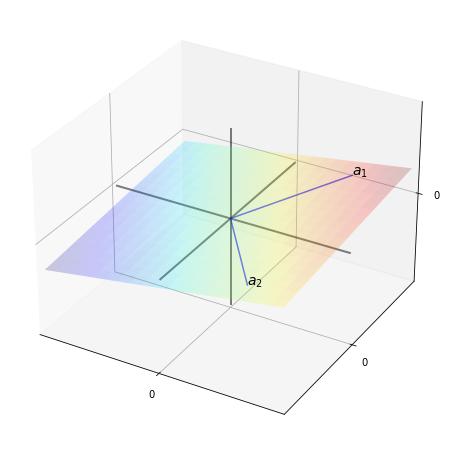

In [18]:
fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')

x_min, x_max = -5, 5
y_min, y_max = -5, 5

α, β = 0.2, 0.1

ax.set(xlim=(x_min, x_max), ylim=(x_min, x_max), zlim=(x_min, x_max),
       xticks=(0,), yticks=(0,), zticks=(0,))

gs = 3
z = np.linspace(x_min, x_max, gs)
x = np.zeros(gs)
y = np.zeros(gs)
ax.plot(x, y, z, 'k-', lw=2, alpha=0.5)
ax.plot(z, x, y, 'k-', lw=2, alpha=0.5)
ax.plot(y, z, x, 'k-', lw=2, alpha=0.5)


# Fixed linear function, to generate a plane
def f(x, y):
    return α * x + β * y

# Vector locations, by coordinate
x_coords = np.array((3, 3))
y_coords = np.array((4, -4))
z = f(x_coords, y_coords)
for i in (0, 1):
    ax.text(x_coords[i], y_coords[i], z[i], f'$a_{i+1}$', fontsize=14)

# Lines to vectors
for i in (0, 1):
    x = (0, x_coords[i])
    y = (0, y_coords[i])
    z = (0, f(x_coords[i], y_coords[i]))
    ax.plot(x, y, z, 'b-', lw=1.5, alpha=0.6)


# Draw the plane
grid_size = 20
xr2 = np.linspace(x_min, x_max, grid_size)
yr2 = np.linspace(y_min, y_max, grid_size)
x2, y2 = np.meshgrid(xr2, yr2)
z2 = f(x2, y2)
ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.jet,
                linewidth=0, antialiased=True, alpha=0.2)
plt.show()